<a href="https://colab.research.google.com/github/nishantsingh-github/Nishant-ML-Repository/blob/main/Customer%20Churn%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix,ConfusionMatrixDisplay


In [60]:
df= pd.read_csv("/content/drive/MyDrive/data /Churn_Modelling.csv")

In [61]:
df.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [62]:
#Check Wether the DATA IN IMBALNECED or Not
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

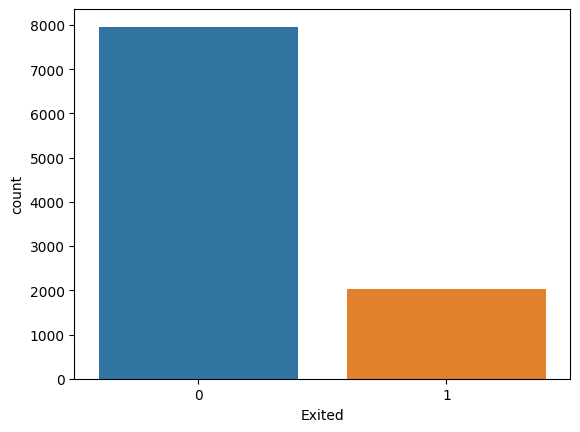

In [63]:
sns.countplot(x='Exited',data =df)

In [64]:
#Data is Highly Imbalnced
#devide the class
class_0 =df[df.Exited==0]
class_1 =df[df.Exited==1]

In [65]:
print(class_0.shape)
print(class_1.shape)

(7963, 14)
(2037, 14)


In [66]:
#class_1.shape[0]/df.shape[0]*100
print("Proportion of Minority Class:" +str(round(class_1.shape[0]/df.shape[0]*100,2)))
print("Proportion of Majority Class:" +str(round(class_0.shape[0]/df.shape[0]*100,2)))

Proportion of Minority Class:20.37
Proportion of Majority Class:79.63


In [67]:
# Now be apply some resapling tecnique
# for that we have to apply train and test
X= df.drop(columns=['Exited','RowNumber','CustomerId','Surname'])
y =df["Exited"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 ,random_state = 42,stratify =y)
#stratify =  y ,so minority class is equal in both train and test ,there is no sapling bias in data

In [68]:
#check the saples in each class
print("proportion of minority in train :"+ str(round(y_train.sum()/len(y_train)*100 ,2)))
print("proportion of minority in test :"+ str(round(y_test.sum()/len(y_test)*100 ,2)))

proportion of minority in train :20.37
proportion of minority in test :20.37


In [69]:
# now we can apply Algorithms without resapling
# and find the accuracy and confusuion matrics


In [70]:
#before apply algo use Encodong , sampling
#or we can also apply OHE class of sklearn
X_train = pd.get_dummies(X_train,columns=['Geography','Gender'],drop_first=True)
X_test= pd.get_dummies(X_test,columns=['Geography','Gender'],drop_first=True)

In [71]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9136,595,20,4,95830.43,1,1,0,177738.98,0,0,1
6410,689,63,1,0.00,2,1,1,186526.12,0,1,0
2607,814,31,1,118870.92,1,1,0,101704.19,0,0,1
3201,722,20,6,0.00,2,1,0,195486.28,0,0,1
3330,738,18,4,0.00,2,1,1,47799.15,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1467,624,35,0,180303.24,2,1,0,163587.90,1,0,0
4644,712,74,5,0.00,2,0,0,151425.82,0,1,1
8942,667,37,9,71786.90,2,1,1,67734.79,0,0,0
2935,687,35,8,100988.39,2,1,0,22247.27,0,1,1


In [72]:
#now we have to Scale the values


In [73]:
ss =StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled =ss.transform(X_test)

In [74]:
X_test_scaled

array([[ 1.44446154, -0.18899111,  0.34216239, ..., -0.57823004,
         1.72744428,  0.90036493],
       [-1.34216297, -0.37813083,  0.34216239, ..., -0.57823004,
        -0.57888987,  0.90036493],
       [ 0.63644403, -0.18899111, -1.38692851, ..., -0.57823004,
        -0.57888987, -1.11066076],
       ...,
       [-1.54934695,  0.09471847, -0.00365579, ...,  1.72941551,
        -0.57888987,  0.90036493],
       [ 1.46517994, -0.94554999, -0.34947397, ...,  1.72941551,
        -0.57888987, -1.11066076],
       [-0.26480628, -1.60753901,  1.37961693, ..., -0.57823004,
        -0.57888987,  0.90036493]])

In [75]:
#now we apply algo


In [76]:
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [77]:
y_pred = lr.predict(X_test_scaled)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

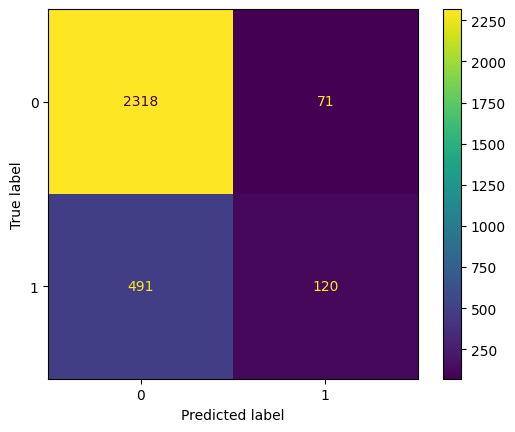

In [78]:
#conf_matrix =confusion_matrix(y_true=y_test,y_pred=y_pred)
# Print the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true=y_test,y_pred=y_pred))

cm_display.plot()
plt.plot

In [79]:
accuracy_score_orginal = round(accuracy_score(y_test,y_pred)*100,2) #Accuracy measures how often our  model is predicted correct
precision_score_orginal= round(precision_score(y_test,y_pred)*100,2)#no of positives that u predicted, they are actually positive?
recall_score_orginal = round(recall_score(y_test,y_pred)*100,2)#out of all positive ,how many positive predicted.
#recall(which are positives that have been incorrectly predicted as negative).
f1_score_orginal = round(f1_score(y_test,y_pred)*100,2) #F-score is the "harmonic mean" of precision and sensitivity.


In [80]:
orginal_matrix=[accuracy_score_orginal,precision_score_orginal,recall_score_orginal,f1_score_orginal]
orginal = pd.DataFrame(orginal_matrix)
orginal.index =['accuracy_score','precision_score','recall_score','f1_score']
orginal.columns=['orginal_data']
orginal


,orginal_data
accuracy_score,81.27
precision_score,62.83
recall_score,19.64
f1_score,29.93


In [81]:
orginal['Comment']=['81.3% our model is correct predicted (shi ko shi ,or galat ko galat)',
                    "only 63% of the customer are indentify who is  actully are intrested in churn" ,#shirf 63%
                    'only 20% of the potentially churn customer are indentified ',
                  'harmonic mean of precision ,aand recall'
                    ]
orginal

,orginal_data,Comment
accuracy_score,81.27,81.3% our model is correct predicted (shi ko s...
precision_score,62.83,only 63% of the customer are indentify who is ...
recall_score,19.64,only 20% of the potentially churn customer are...
f1_score,29.93,"harmonic mean of precision ,aand recall"


so ,even have the accuracy  of about 81% ,our model does not perform well in term of precison ,recall,f1 score.This illustrate  accuracy is not the right matrix .

# Now we apply  multiple resample technique to handle imbalnced data
1.To change the Thresold
2. Resampling (Oversampling and Undersampling)
    !Undersampling
    !random under sampling
    ! Random Under-Sampling With Imblearn
    ! Under-Sampling: Tomek Links
    !Oversampling
    ! Random Over-Sampling With imblear
    !Synthetic Minority Oversampling Technique (SMOTE)
3.chose the right mmatrix
4.

In [82]:
#Random Oversampling Sampling and Undersampling (resample)
# 1.Random Oversampling (reasmple hamesha training data pr hoga)
from sklearn.utils import resample

df_train= pd.concat([X_train,y_train],axis =1 )
df_majority = df_train[(df_train['Exited']==0)]
df_minority = df_train[(df_train['Exited']==1)]
df_minority_over = resample(df_minority ,
                     replace =True, # sample with replacement
                     n_samples= len(df_majority), # to match majority class
                     random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_oversampled = pd.concat([df_minority_over, df_majority])



In [83]:
df_oversampled['Exited'].value_counts()
#df_oversampled['Exited'].value_counts().plot(kind='bar')

1    5574
0    5574
Name: Exited, dtype: int64

In [84]:
X_train_oversampled = df_oversampled.drop(columns=['Exited'])
y_train_oversampled = df_oversampled['Exited']

In [85]:
ss =StandardScaler()

df_train_scaled =ss.fit_transform(X_train_oversampled) #it is like traing data
df_test_scled =ss.transform(X_test)

In [86]:
#Now we train the model (we train model on upsampled data but test on our orginal Test data)
lr.fit(df_train_scaled,y_train_oversampled)


LogisticRegression()

In [87]:
y_pred_over =lr.predict(df_test_scled)

In [88]:
accuracy_score(y_pred_over,y_test)

0.7153333333333334

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

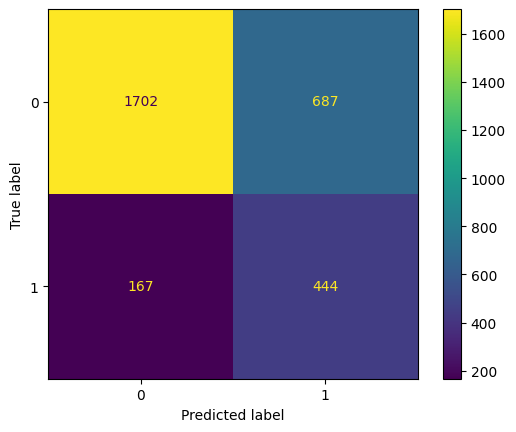

In [89]:
conf_matrix =confusion_matrix(y_true=y_test,y_pred=y_pred_over)
# Print the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix)

cm_display.plot()
plt.plot

In [90]:
accuracy_score_oversapmling = round(accuracy_score(y_test,y_pred_over)*100,2) #Accuracy measures how often our  model is predicted correct
precision_score_oversapmling= round(precision_score(y_test,y_pred_over)*100,2)#no of positives that u predicted, they are actually positive?
recall_score_oversapmling = round(recall_score(y_test,y_pred_over)*100,2)#out of all positive ,how many positive predicted.
#recall(which are positives that have been incorrectly predicted as negative).
f1_score_oversapmling = round(f1_score(y_test,y_pred_over)*100,2) #F-score is the "harmonic mean" of precision and sensitivity

In [91]:
#precision = shi pahchanana ,shirf 40% ko hi shi identify kiya ki bo syad chod sakte h

In [92]:
oversapmling_matrix=[accuracy_score_oversapmling,precision_score_oversapmling,recall_score_oversapmling,f1_score_oversapmling]
orginal = pd.DataFrame(list(zip(orginal_matrix,oversapmling_matrix)))
orginal.index =['accuracy_score','precision_score','recall_score','f1_score']
orginal.columns=['orginal_data' ,'Oversampling']

orginal

,orginal_data,Oversampling
accuracy_score,81.27,71.53
precision_score,62.83,39.26
recall_score,19.64,72.67
f1_score,29.93,50.98


In [93]:
# Random Under Sampling
df_majority_under= resample (df_majority,
                               replace = False,
                               n_samples = len(df_minority))

df_undersampled =pd.concat([df_majority_under,df_minority])


In [94]:
df_undersampled['Exited'].value_counts()

0    1426
1    1426
Name: Exited, dtype: int64

In [95]:
X_train_under = df_undersampled.drop(columns="Exited")
Y_train_under = df_undersampled["Exited"]

In [96]:
# now scaled the values
train_scaled =ss.fit_transform(X_train_under)
test_scaled =ss.transform(X_test)

In [97]:
train_scaled

array([[ 6.38867568e-02, -1.23160992e+00,  6.88905080e-01, ...,
        -6.55965603e-01, -5.50343553e-01, -1.03207081e+00],
       [ 5.83047411e-01, -1.70562567e+00, -1.33110063e-03, ...,
        -6.55965603e-01,  1.81704681e+00, -1.03207081e+00],
       [-3.53477691e-01,  3.80043622e-01,  1.37914126e+00, ...,
         1.52447018e+00, -5.50343553e-01, -1.03207081e+00],
       ...,
       [ 1.51957251e+00,  1.32807512e+00,  1.72425935e+00, ...,
        -6.55965603e-01, -5.50343553e-01, -1.03207081e+00],
       [-2.92399967e-01,  1.51768142e+00, -6.91567281e-01, ...,
         1.52447018e+00, -5.50343553e-01,  9.68925761e-01],
       [ 5.01610446e-01,  9.56341731e-02, -1.38180346e+00, ...,
        -6.55965603e-01, -5.50343553e-01, -1.03207081e+00]])

In [98]:
# now we train two model 1.Logestic regression 2. XGBoost
lr.fit(train_scaled,Y_train_under)

LogisticRegression()

In [99]:
y_pred_lr_under =lr.predict(test_scaled)

In [100]:
accuracy_score(y_test,y_pred_lr_under)

0.7156666666666667

Text(0.5, 1.0, 'confusion _under_lr')

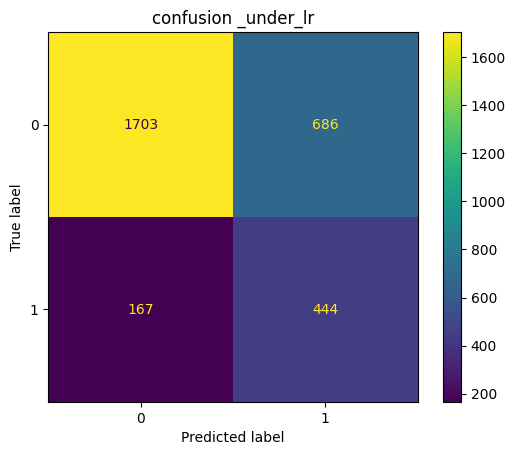

In [101]:
#display Confusion Matrix
conf_mat = ConfusionMatrixDisplay(confusion_matrix =confusion_matrix(y_test,y_pred_lr_under))
conf_mat.plot()
plt.title("confusion _under_lr")

In [109]:
# also train XGBboostclassifor
import xgboost as xgb
xgb_under =xgb.XGBClassifier()
xgb_under.fit(train_scaled,Y_train_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [110]:
y_pred_xgb =xgb_under.predict(X_test_scaled)
accuracy_score(y_test,y_pred_xgb)

0.7296666666666667

Text(0.5, 1.0, 'Confusion XGB Under sampling')

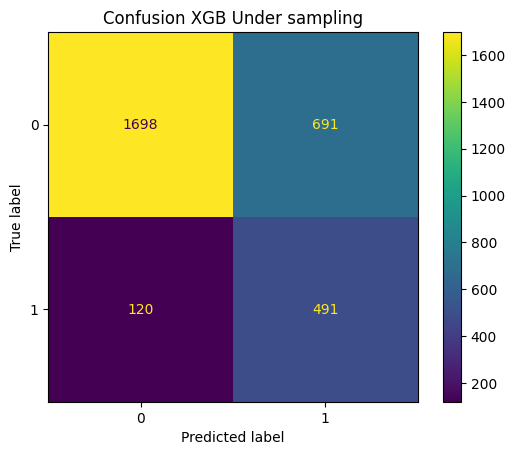

In [112]:
con_mat = ConfusionMatrixDisplay(confusion_matrix =confusion_matrix(y_test,y_pred_xgb))
con_mat.plot()
plt.title("Confusion XGB Under sampling")

In [106]:
accuracy_score_underapmling = round(accuracy_score(y_test,y_pred_lr_under)*100,2) #Accuracy measures how often our  model is predicted correct
precision_score_undersapmling= round(precision_score(y_test,y_pred_lr_under)*100,2)#no of positives that u predicted, they are actually positive?
recall_score_undersapmling = round(recall_score(y_test,y_pred_lr_under)*100,2)#out of all positive ,how many positive predicted.
#recall(which are positives that have been incorrectly predicted as negative).
f1_score_undersapmling = round(f1_score(y_test,y_pred_lr_under)*100,2) #F-score is the "harmonic mean" of precision and sensitivity

In [115]:
accuracy_score_underapmling_xgb= round(accuracy_score(y_test,y_pred_xgb)*100,2) #Accuracy measures how often our  model is predicted correct
precision_score_undersapmling_xbg= round(precision_score(y_test,y_pred_xgb)*100,2)#no of positives that u predicted, they are actually positive?
recall_score_undersapmling_xgb = round(recall_score(y_test,y_pred_xgb)*100,2)#out of all positive ,how many positive predicted.
#recall(which are positives that have been incorrectly predicted as negative).
f1_score_undersapmling_xgb = round(f1_score(y_test,y_pred_xgb)*100,2) #F-score is the "harmonic mean" of precision and sensitivity

In [116]:
#random sapling
xgb_under=[accuracy_score_underapmling_xgb,precision_score_undersapmling_xbg,recall_score_undersapmling_xgb,f1_score_undersapmling_xgb]
under_mat=[accuracy_score_underapmling,precision_score_undersapmling,recall_score_undersapmling,f1_score_undersapmling]
orginal=pd.DataFrame(list(zip(orginal_matrix,oversapmling_matrix,under_mat,xgb_under)))
orginal.index =['accuracy_score','precision_score','recall_score','f1_score']
orginal.columns=['orginal_data' ,'Oversampling',"Undersampling",'XGBoost']
orginal


,orginal_data,Oversampling,Undersampling,XGBoost
accuracy_score,81.27,71.53,71.57,72.97
precision_score,62.83,39.26,39.29,41.54
recall_score,19.64,72.67,72.67,80.36
f1_score,29.93,50.98,51.01,54.77


XBGoost algo is best along with Undersamplig bc it has highest Recall